In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
!pip install eli5
import eli5

     |████████████████████████████████| 112kB 6.5MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
events = pd.read_csv('events.csv')
info = pd.read_csv('ginf.csv')

events = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')
extract_year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
events['year'] = [extract_year(x) for key, x in enumerate(events['date'])]

In [ ]:
shots = events[events.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()
shots.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,Mladen Petric,Gokhan Tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,Shinji Kagawa,Mario Gotze,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0,Germany,2011-08-05,2011
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,Kevin Grosskreutz,Mario Gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0,Germany,2011-08-05,2011
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,Mats Hummels,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,Tomas Rincon,NaN,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0,Germany,2011-08-05,2011


In [ ]:
pieChart = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})
pieChart.shot_outcome = pieChart.shot_outcome.astype(int)
pieChart.shot_outcome = pieChart.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

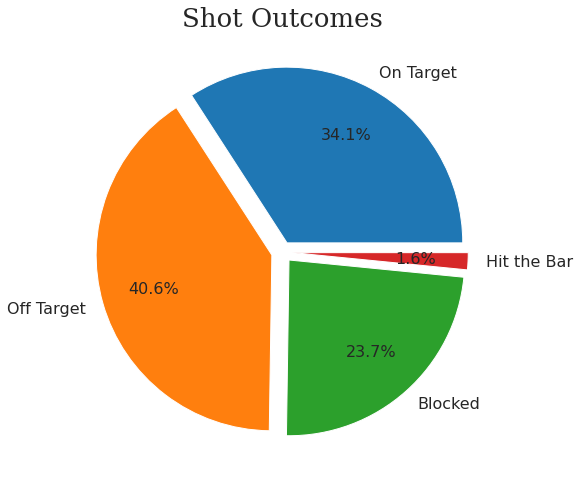

In [ ]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
plt.pie(x=pieChart['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [ ]:
barChart = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
barChart.shot_place = barChart.shot_place.astype(int)
barChart.shot_place = barChart.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', 5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', 9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal',12: 'Top left corner', 13: 'Top right corner'})

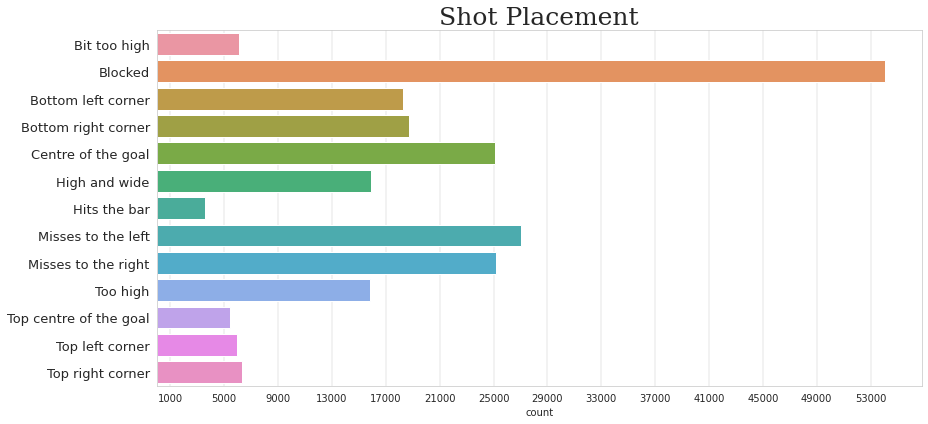

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = barChart['shot_place']
ax = sns.barplot(x=barChart['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [ ]:
goals  = shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [ ]:
goals['percentage']=0
for i in range(len(goals)):
    for country in goals.country.unique():
        if goals.iloc[i,goals.columns.get_loc("country")]==country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)
goals.head(10)

,is_goal,country,count,percentage
0,No Goal,England,30360,89.53
1,No Goal,France,43795,89.39
2,No Goal,Germany,36916,88.87
3,No Goal,Italy,49253,89.97
4,No Goal,Spain,44370,88.83
5,Goal,England,3552,10.47
6,Goal,France,5199,10.61
7,Goal,Germany,4621,11.13
8,Goal,Italy,5491,10.03
9,Goal,Spain,5578,11.17


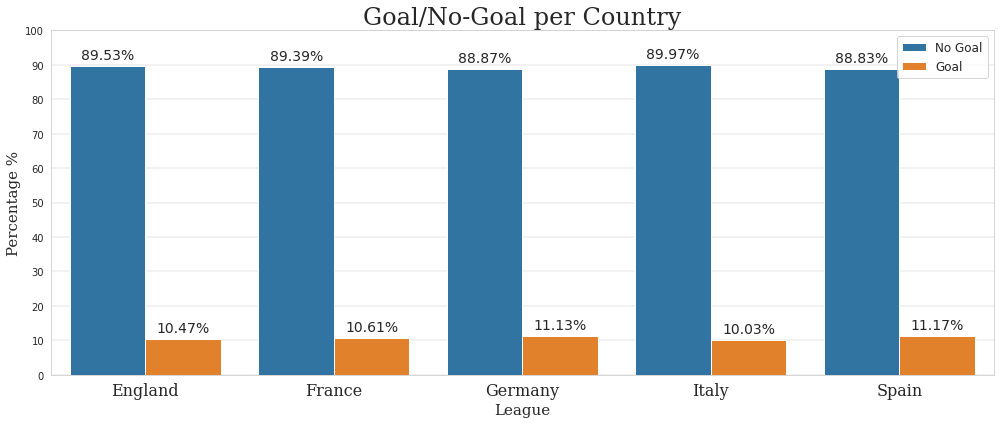

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [ ]:
goals  = shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [ ]:
goals['percentage']=0
for i in range(len(goals)):
    for year in goals.year.unique():
        if goals.iloc[i,goals.columns.get_loc("year")]==year:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.year==year]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)
goals.head(10)

,is_goal,year,count,percentage
0,No Goal,2011,14549,89.78
1,No Goal,2012,32526,89.27
2,No Goal,2013,35019,89.26
3,No Goal,2014,39964,89.51
4,No Goal,2015,41000,89.54
5,No Goal,2016,38953,88.86
6,No Goal,2017,2683,89.73
7,Goal,2011,1656,10.22
8,Goal,2012,3909,10.73
9,Goal,2013,4212,10.74


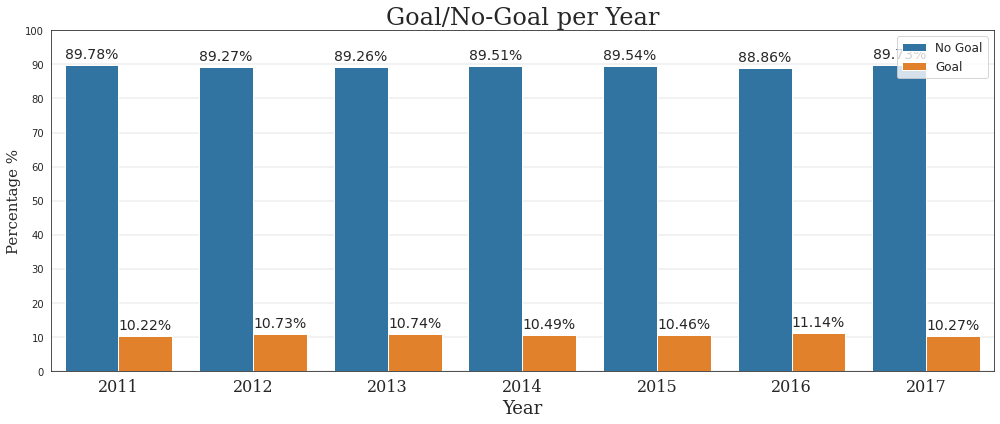

In [ ]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [ ]:
data = pd.get_dummies(shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = shots['is_goal']
data.head()

,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,penalty,outside_box,long_range,more_35y,more_40y,not_recorded,right_foot,left_foot,header,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick,is_goal
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
print(len(data))
print(data.is_goal.sum())
print(len(data.columns)-1)

229135
24441
28


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test)),
        'f1_score': f1_score(y_test, model.predict(X_test)),
        'train_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test),
    }

def objective(params):
    res = evaluate_model(params)
    
    res['loss'] = - res['test_ROCAUC'] 
    res['status'] = STATUS_OK 
    return res 

hyperparameter_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [ ]:
trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

100%|██████████| 50/50 [19:04<00:00, 22.90s/it, best loss: -0.8205248938462949]


In [ ]:
pd.DataFrame(trials.results).sort_values(by='f1_score', ascending=False).head(5)

,learning_rate,min_samples_leaf,max_depth,max_features,train_ROCAUC,test_ROCAUC,recall,precision,f1_score,train_accuracy,test_accuracy,loss,status
45,0.215842,80,11,21,0.818930,0.819236,0.267515,0.713845,0.389183,0.910550,0.911284,-0.819236,ok
36,0.202948,40,10,23,0.819037,0.819143,0.267515,0.713216,0.389089,0.910591,0.911249,-0.819143,ok
46,0.264814,60,16,17,0.819206,0.818753,0.267350,0.713089,0.388896,0.910626,0.911232,-0.818753,ok
11,0.257390,27,19,21,0.819403,0.818649,0.267515,0.711648,0.388856,0.910661,0.911162,-0.818649,ok
41,0.156657,18,13,11,0.819313,0.818694,0.267350,0.712775,0.388849,0.910644,0.911214,-0.818694,ok


In [ ]:
model = GradientBoostingClassifier(
                        learning_rate=0.215842,
                        min_samples_leaf=80,
                        max_depth = 11,
                        max_features = 21
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.215842, loss='deviance',
                           max_depth=11, max_features=21, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=80, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print('Accuracy = {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('ROC-AUC = {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

Accuracy = 91%.
ROC-AUC = 82%


In [ ]:
print(confusion_matrix(y_test,model.predict(X_test)))
print(classification_report(y_test,model.predict(X_test)))

[[50583   649]
 [ 4435  1617]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     51232
           1       0.71      0.27      0.39      6052

    accuracy                           0.91     57284
   macro avg       0.82      0.63      0.67     57284
weighted avg       0.90      0.91      0.89     57284



In [ ]:
eli5.explain_weights(model, feature_names=list(X_train.columns))

Weight,Feature
0.1943 ± 0.1129,close_range
0.1907 ± 0.1228,not_recorded
0.1891 ± 0.1115,penalty
0.1332 ± 0.1234,outside_box
0.0779 ± 0.1193,loc_centre_box
0.0614 ± 0.0630,fast_break
0.0310 ± 0.1068,header
0.0287 ± 0.0366,assist_through_ball
0.0211 ± 0.0860,assist_cross
0.0137 ± 0.0668,open_play


In [ ]:
shots['prediction'] = model.predict_proba(X)[:, 1]
shots['difference'] = shots['is_goal'] - shots['prediction']
shots.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(229135, 27)

In [ ]:
playerLevel = shots.groupby('player').sum().reset_index()
playerLevel.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
playerLevel.expectedGoals = round(playerLevel.expectedGoals,2)
playerLevel.difference = round(playerLevel.difference,2)
playerLevel['ratio'] = playerLevel['trueGoals'] / playerLevel['expectedGoals']
playerLevel.head(5)

,player,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,trueGoals,location,bodypart,assist_method,situation,fast_break,year,expectedGoals,difference,ratio
0,Aaron,2466,2335,48,432.0,70,284.0,92.0,1,560.0,62.0,43,53.0,0,96689,3.49,-2.49,0.286533
1,Aaron Cresswell,2215,2384,52,408.0,75,317.0,107.0,4,629.0,103.0,38,66.0,2,104795,3.44,0.56,1.162791
2,Aaron Hughes,56,55,1,15.0,2,0.0,0.0,1,19.0,1.0,0,1.0,0,2013,0.98,0.02,1.020408
3,Aaron Hunt,12387,10517,215,1563.0,278,1075.0,428.0,25,2524.0,409.0,181,274.0,7,432783,26.41,-1.41,0.946611
4,Aaron Lennon,2521,2747,57,480.0,85,278.0,112.0,8,557.0,69.0,55,66.0,1,114843,5.30,2.70,1.509434


In [ ]:
print(round(playerLevel.expectedGoals.corr(playerLevel.trueGoals),3))

0.977


In [ ]:
show = playerLevel.sort_values(['difference', 'trueGoals'],ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

,rank,player,difference,trueGoals,expectedGoals
0,1,Lionel Messi,58.70,205,146.30
1,2,Zlatan Ibrahimovic,33.87,153,119.13
2,3,Cristiano Ronaldo,32.54,198,165.46
3,4,Gonzalo Higuain,31.68,118,86.32
4,5,Luis Suarez,31.57,96,64.43


In [ ]:
show = playerLevel[playerLevel['trueGoals']>30].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

,rank,player,ratio,trueGoals,expectedGoals
0,1,Franck Ribery,1.894837,40,21.11
1,2,Mario Gotze,1.579172,37,23.43
2,3,Bas Dost,1.555076,36,23.15
3,4,Heungmin Son,1.525990,32,20.97
4,5,Carlos Tevez,1.493681,39,26.11
